<a href="https://colab.research.google.com/github/LoowieOblivion-Serafin/Simulacion-de-Rejilla-IEM/blob/main/SIMULACION_Exp_REJILLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

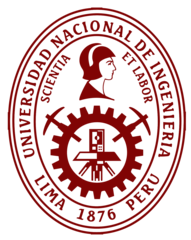

## UNI - FACULTAD DE CIENCIAS
En este experimento, estudiamos el fenómeno de la difracción utilizando una rejilla.A continuación, se muestra una imagen relacionada:

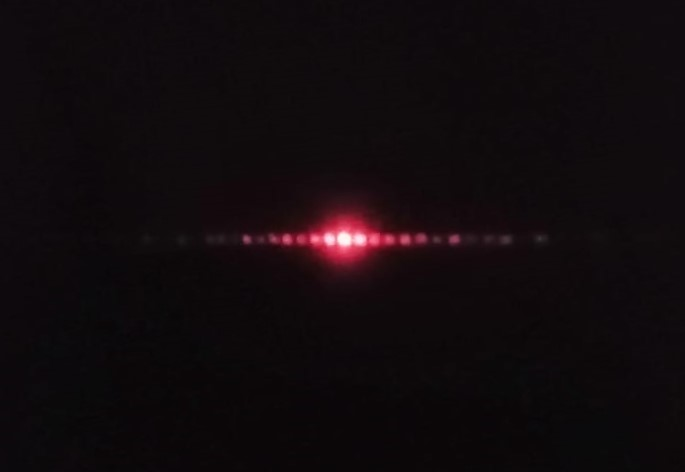

##**Materia**: Introduccion a la Electricidad y Magnetismo

**Profesor**: Dr. Juan Pérez


# Código Python para Simulación de Difracción


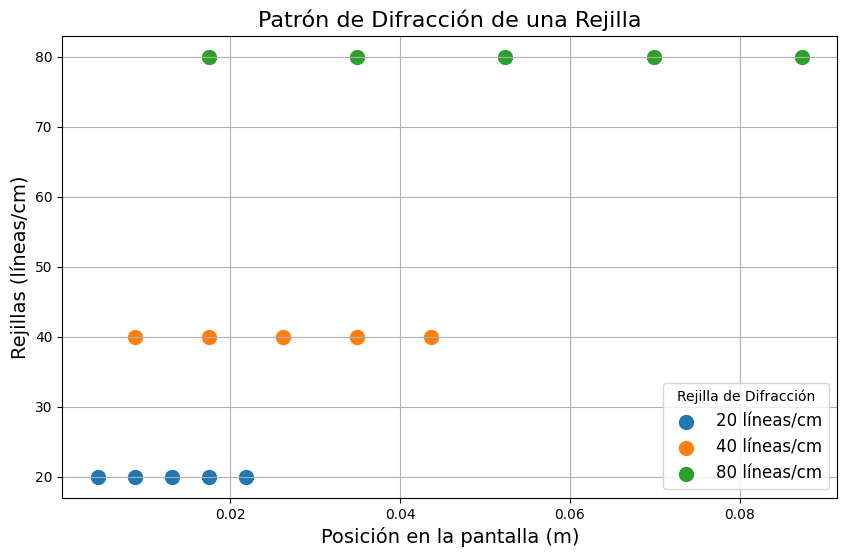

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del experimento
lambda_nehe = 632.8e-9  # Longitud de onda del láser Ne-He (en metros)
L = 3.45  # Distancia entre la rejilla y la pantalla (en metros)

# Rejillas con diferentes líneas por cm
lineas_por_cm = [20, 40, 80]  # Rejillas de 20, 40 y 80 líneas/cm

# Convertir las líneas por cm a líneas por metro
lineas_por_metro = [n * 100 for n in lineas_por_cm]
# Calcular el espaciado de las líneas (d) en metros
d = [1 / n for n in lineas_por_metro]

# Número de máximos a calcular
maximos = 5  # Calcularemos los primeros 5 máximos (m = 1, 2, 3, 4, 5)

# Función para calcular el ángulo de difracción para un orden m
def calcular_angulo(d, m, lambda_nehe):
    # Aplicar la fórmula d * sin(θ) = m * λ
    theta_rad = np.arcsin(m * lambda_nehe / d)
    return np.degrees(theta_rad)  # Convertir de radianes a grados

# Función para calcular la posición en la pantalla de cada máximo
def calcular_posiciones(angulo, L):
    # Utilizamos la fórmula x = L * tan(θ)
    return L * np.tan(np.radians(angulo))

# Generar el patrón de difracción para cada rejilla
fig, ax = plt.subplots(figsize=(10, 6))

for i, rejilla in enumerate(lineas_por_cm):
    # Calcular las posiciones de los máximos para la rejilla actual
    angulos = [calcular_angulo(d[i], m, lambda_nehe) for m in range(1, maximos + 1)]
    posiciones = [calcular_posiciones(angulo, L) for angulo in angulos]

    # Graficar los máximos en la pantalla
    ax.scatter(posiciones, [rejilla] * len(posiciones), label=f'{rejilla} líneas/cm', s=100)

# Configurar gráfico
ax.set_title("Patrón de Difracción de una Rejilla", fontsize=16)
ax.set_xlabel("Posición en la pantalla (m)", fontsize=14)
ax.set_ylabel("Rejillas (líneas/cm)", fontsize=14)
ax.legend(title="Rejilla de Difracción", fontsize=12)
ax.grid(True)

# Mostrar el gráfico
plt.show()


¿Qué hace este código?

-Genera el patrón de difracción para tres rejillas diferentes (20, 40 y 80 líneas/cm).

-Muestra las posiciones de los primeros 5 máximos de difracción (
𝑚
=
1
,
2
,
3
,
4
,
5
m=1,2,3,4,5) para cada rejilla en una pantalla a
𝐿
=
3.45
L=3.45 metros de distancia.

-Los máximos para cada rejilla se presentan en un gráfico comparativo.

# Codigo de Simulacion Interactiva.


In [ ]:
# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interactive

# Parámetros constantes
lambda_nehe = 632.8e-9  # Longitud de onda del láser Ne-He en metros (por defecto)
L = 3.45  # Distancia entre la rejilla y la pantalla (en metros)
maximos = 5  # Cantidad de máximos a calcular (por ejemplo, m = 1, 2, 3, ..., 5)

# Función para calcular el ángulo de difracción para un orden m
def calcular_angulo(d, m, lambda_nehe):
    # Fórmula de difracción d * sin(θ) = m * λ
    return np.arcsin(m * lambda_nehe / d)

# Función para simular el patrón de difracción
def simular_difraccion(lineas_cm, maximos=5, lambda_nehe=632.8e-9, L=3.45):
    # Convertir líneas por cm a líneas por metro
    lineas_metro = lineas_cm * 100
    # Calcular el espaciado d (en metros)
    d = 1 / lineas_metro

    # Ángulos de difracción para los primeros máximos de orden m
    angulos = [calcular_angulo(d, m, lambda_nehe) for m in range(1, maximos+1)]

    # Calcular las posiciones x de los máximos en la pantalla (relacionado con los ángulos)
    x = [L * np.tan(theta) for theta in angulos]

    # Crear el gráfico
    plt.figure(figsize=(8, 6))
    plt.plot(x, [m for m in range(1, maximos+1)], 'bo-', label=f'Rejilla: {lineas_cm} líneas/cm')
    plt.title(f'Patrón de Difracción - Rejilla {lineas_cm} líneas/cm')
    plt.xlabel('Posición en la pantalla (m)')
    plt.ylabel('Orden del máximo (m)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Widgets interactivos
widget_lineas_cm = widgets.IntSlider(value=40, min=10, max=100, step=10, description='Líneas por cm:')
widget_maximos = widgets.IntSlider(value=5, min=1, max=10, step=1, description='Máximos (m):')

# Función interactiva
interactive_plot = interactive(simular_difraccion,
                               lineas_cm=widget_lineas_cm,
                               maximos=widget_maximos)

# Mostrar el widget
display(interactive_plot)


interactive(children=(IntSlider(value=40, description='Líneas por cm:', min=10, step=10), IntSlider(value=5, d…

# Variación del Ángulo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interactive

# Parámetros constantes
lambda_nehe_default = 632.8e-9  # Longitud de onda del láser Ne-He (por defecto en metros)
L_default = 3.45  # Distancia entre la rejilla y la pantalla (en metros)

# Función para calcular el ángulo de difracción para un orden m
def calcular_angulo(d, m, lambda_nehe):
    """
    Calcula el ángulo de difracción para un orden m dado.
    d: Espaciado entre las líneas de la rejilla (en metros)
    m: Orden del máximo (1, 2, 3,...)
    lambda_nehe: Longitud de onda del láser (en metros)
    """
    # Usamos la fórmula d * sin(θ) = m * λ para calcular el ángulo en radianes
    return np.arcsin(m * lambda_nehe / d)

# Función para simular el patrón de difracción
def simular_difraccion(lambda_nehe, L, lineas_cm, maximos):
    """
    Simula el patrón de difracción de una rejilla con diferentes parámetros.
    lambda_nehe: Longitud de onda del láser en metros
    L: Distancia entre la rejilla y la pantalla (en metros)
    lineas_cm: Número de líneas por cm de la rejilla
    maximos: Número de máximos a mostrar en el gráfico
    """
    # Convertimos las líneas por cm a líneas por metro
    lineas_por_metro = lineas_cm * 100

    # Espaciado entre las líneas de la rejilla (d)
    d = 1 / lineas_por_metro  # Espaciado entre las líneas de la rejilla en metros

    # Ángulos de difracción para los primeros 'maximos' órdenes
    angulos = []
    for m in range(1, maximos + 1):
        # Calcular el ángulo en radianes
        angulo_rad = calcular_angulo(d, m, lambda_nehe)
        angulos.append(angulo_rad)

    # Convertir los ángulos de radianes a grados
    angulos_grados = np.degrees(angulos)

    # Mostrar el gráfico de la difracción
    plt.figure(figsize=(8, 6))

    # Calcular la posición en la pantalla para cada máximo
    posiciones = [np.tan(angulo) * L for angulo in angulos]

    # Graficar el patrón de difracción
    plt.plot(posiciones, angulos_grados, 'ro-', label=f'λ = {lambda_nehe*1e9} nm', markersize=8)
    plt.title('Patrón de Difracción de una Rejilla')
    plt.xlabel('Posición en la pantalla (m)')
    plt.ylabel('Ángulo de difracción (°)')
    plt.grid(True)
    plt.axhline(0, color='black',linewidth=1)
    plt.axvline(0, color='black',linewidth=1)
    plt.legend()
    plt.show()

    # Imprimir los resultados de los ángulos
    for m, angulo in zip(range(1, maximos + 1), angulos_grados):
        print(f"Máximo de orden {m}: Ángulo = {angulo:.2f}°")

# Crear los widgets interactivos
widgets_interactivos = interactive(
    simular_difraccion,
    lambda_nehe=widgets.FloatSlider(value=lambda_nehe_default, min=400e-9, max=700e-9, step=1e-9, description='Long. Onda (λ):'),
    L=widgets.FloatSlider(value=L_default, min=1.0, max=5.0, step=0.1, description='Distancia (L):'),
    lineas_cm=widgets.Dropdown(options=[20, 40, 80], value=40, description='Líneas/cm:'),
    maximos=widgets.IntSlider(value=5, min=1, max=10, step=1, description='Máximos:')
)

# Mostrar el widget interactivo
widgets_interactivos


interactive(children=(FloatSlider(value=6.328e-07, description='Long. Onda (λ):', max=7e-07, min=4e-07, step=1…

# Patron de Difraccion en Base Maximos


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interactive

# Parámetros constantes
lambda_nehe_default = 632.8e-9  # Longitud de onda del láser Ne-He (en metros)
L_default = 3.45  # Distancia entre la rejilla y la pantalla (en metros)

# Función para calcular el ángulo de difracción para un orden m
def calcular_angulo(d, m, lambda_nehe):
    """
    Calcula el ángulo de difracción para un orden m dado.
    d: Espaciado entre las líneas de la rejilla (en metros)
    m: Orden del máximo (1, 2, 3,...)
    lambda_nehe: Longitud de onda del láser (en metros)
    """
    return np.arcsin(m * lambda_nehe / d)

# Función para generar el patrón de difracción y calcular la distancia entre las imágenes proyectadas
def simular_difraccion(lineas_cm, lambda_nehe=lambda_nehe_default, L=L_default, maximos=5):
    """
    Simula el patrón de difracción para una rejilla con el número de líneas por cm dado.
    """
    # Convertir líneas por cm a líneas por metro y calcular el espaciado d
    lineas_por_metro = lineas_cm * 100  # Convertir a líneas por metro
    d = 1 / lineas_por_metro  # Espaciado entre las líneas de la rejilla

    # Ángulos de difracción y distancias
    angulos = []
    distancias = []

    for m in range(1, maximos + 1):
        # Calcular ángulo de difracción
        theta = calcular_angulo(d, m, lambda_nehe)
        # Calcular la distancia entre el máximo de difracción y el máximo central en la pantalla
        x = L * np.tan(theta)

        angulos.append(np.degrees(theta))  # Convertir a grados
        distancias.append(x)

    # Graficar el patrón de difracción
    plt.figure(figsize=(10, 6))
    plt.axhline(0, color='black', linewidth=0.5)  # Línea para representar la pantalla
    plt.scatter(distancias, [0] * len(distancias), color='red', s=100, zorder=5)  # Máximos de difracción

    # Mostrar los máximos de difracción con sus valores
    for i, (distancia, angulo) in enumerate(zip(distancias, angulos)):
        # Desplazar la posición en y para evitar solapamientos
        y_offset = 0.01 if i % 2 == 0 else -0.01  # Alternar la posición arriba o abajo
        plt.text(distancia, y_offset, f"$m={i+1}$\n$\Theta={angulo:.2f}^\circ$",
                 ha='center', fontsize=12, color='blue')

    # Ajustar límites y etiquetas
    plt.xlim(-max(distancias) - 0.1, max(distancias) + 0.1)
    plt.ylim(-0.05, 0.05)
    plt.title(f"Patrón de Difracción - Rejilla con {lineas_cm} líneas/cm", fontsize=14)
    plt.xlabel("Distancia en la pantalla (m)", fontsize=12)
    plt.ylabel("Intensidad", fontsize=12)
    plt.grid(True)
    plt.show()

# Crear los controles interactivos para la simulación
interact_simulacion = interactive(simular_difraccion,
                                  lineas_cm=widgets.IntSlider(value=40, min=20, max=80, step=20, description='Líneas por cm:'),
                                  lambda_nehe=widgets.FloatSlider(value=lambda_nehe_default, min=400e-9, max=700e-9, step=1e-9, description='Longitud de onda (m):'),
                                  L=widgets.FloatSlider(value=L_default, min=1.0, max=10.0, step=0.1, description='Distancia (m):'),
                                  maximos=widgets.IntSlider(value=5, min=1, max=10, step=1, description='Máximos a mostrar:'))

# Mostrar los controles interactivos
display(interact_simulacion)



interactive(children=(IntSlider(value=40, description='Líneas por cm:', max=80, min=20, step=20), FloatSlider(…

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interactive

# Parámetros constantes
lambda_nehe = 638.2e-9  # Longitud de onda del láser Ne-He (en metros)
L_default = 3.45  # Distancia entre la rejilla y la pantalla (en metros)
maximos = 5  # Máximos a calcular (hasta m=5 por ejemplo)

# Función para calcular el ángulo de difracción para un orden m
def calcular_angulo(d, m, lambda_nehe):
    """
    Calcula el ángulo de difracción para un orden m dado.
    d: Espaciado entre las líneas de la rejilla (en metros)
    m: Orden del máximo (1, 2, 3,...)
    lambda_nehe: Longitud de onda del láser (en metros)
    """
    return np.arcsin(m * lambda_nehe / d)

# Función para simular el patrón de difracción
def simular_difraccion(lineas_cm, distancia_pantalla):
    """
    Simula el patrón de difracción en función de las líneas de la rejilla
    y la distancia entre la rejilla y la pantalla.

    lineas_cm: Número de líneas de la rejilla por cm.
    distancia_pantalla: Distancia entre la rejilla y la pantalla (en metros).
    """
    # Convertir líneas por cm a líneas por metro
    lineas_por_metro = lineas_cm * 100
    # Calcular el espaciado de las líneas (d) en metros
    d = 1 / lineas_por_metro

    # Calcular los ángulos de difracción para los primeros 5 órdenes (máximos)
    angulos = []
    for m in range(1, maximos+1):
        try:
            angulo = calcular_angulo(d, m, lambda_nehe)
            angulos.append(angulo)
        except ValueError:
            # Si el ángulo no es válido (por ejemplo, para m grandes), no lo calculamos
            break

    # Calcular la posición de los máximos proyectados en la pantalla
    posiciones = [distancia_pantalla * np.tan(angulo) for angulo in angulos]

    # Visualizar el patrón de difracción
    fig, ax = plt.subplots(figsize=(8, 6))

    # Dibujar la línea de la pantalla
    ax.axhline(0, color='black', linewidth=1, label="Pantalla")

    # Dibujar los puntos de los máximos proyectados
    for i, pos in enumerate(posiciones):
        ax.plot(pos, 0, 'bo', label=f'Máximo m={i+1} (Distancia={pos*100:.2f} cm)')

    ax.set_title(f"Patrón de Difracción para {lineas_cm} Líneas/cm")
    ax.set_xlabel("Posición en la pantalla (m)")
    ax.set_ylabel("Intensidad")
    ax.legend(loc='upper left')

    # Mostrar los resultados
    plt.grid(True)
    plt.show()

# Crear la interfaz interactiva
def crear_interfaz():
    # Widgets para controlar el número de líneas por cm y la distancia a la pantalla
    slider_lineas = widgets.IntSlider(value=40, min=20, max=80, step=20, description='Líneas/cm:')
    slider_distancia = widgets.FloatSlider(value=L_default, min=1, max=10, step=0.1, description='Distancia (m):')

    # Función para actualizar la simulación
    interactive_plot = interactive(simular_difraccion, lineas_cm=slider_lineas, distancia_pantalla=slider_distancia)

    # Mostrar los controles interactivos
    display(slider_lineas, slider_distancia, interactive_plot)

# Llamar la función para crear la interfaz interactiva
crear_interfaz()


IntSlider(value=40, description='Líneas/cm:', max=80, min=20, step=20)

FloatSlider(value=3.45, description='Distancia (m):', max=10.0, min=1.0)

interactive(children=(IntSlider(value=40, description='Líneas/cm:', max=80, min=20, step=20), FloatSlider(valu…

# Simulacion de la Intensidad

El patrón de difracción para una rejilla de transmisión está relacionado con la fórmula de intensidad de difracción, que para una rejilla de difracción se puede expresar como:

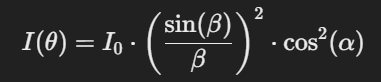

Donde:

𝐼
0
I
0
​
  es la intensidad máxima (cuando la luz pasa sin desviarse, en el máximo central).
𝛼
=
𝜋
𝑑
𝜆
sin
⁡
(
𝜃
)
α=
λ
πd
​
 sin(θ), que es la fase relacionada con la estructura de la rejilla.
𝛽
=
𝑚
𝜋
𝑁
⋅
sin
⁡
(
𝜃
)
β=
N
mπ
​
 ⋅sin(θ), donde
𝑚
m es el orden de difracción (0, 1, 2, …) y
𝑁
N es el número de rendijas en la rejilla.
En este caso, se aplicará esta fórmula para cada orden
𝑚
m y visualizaremos la intensidad en función del ángulo
𝜃
θ, es decir, el ángulo de difracción.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interactive

# Parámetros constantes
lambda_nehe = 638.2e-9  # Longitud de onda del láser Ne-He (en metros)
I0 = 1  # Intensidad máxima en el máximo central

# Función para calcular el ángulo de difracción para un orden m
def calcular_angulo(d, m, lambda_nehe):
    """
    Calcula el ángulo de difracción para un orden m dado.
    d: Espaciado entre las líneas de la rejilla (en metros)
    m: Orden del máximo (1, 2, 3,...)
    lambda_nehe: Longitud de onda del láser (en metros)
    """
    # Usamos la fórmula d * sin(θ) = m * λ para calcular el ángulo en radianes
    return np.arcsin(m * lambda_nehe / d)

# Función para calcular la intensidad en función del ángulo
def intensidad_difraccion(theta, d, N, m):
    """
    Calcula la intensidad de la difracción para un ángulo θ y orden m dado.
    theta: Ángulo de difracción (en radianes)
    d: Espaciado entre las líneas de la rejilla (en metros)
    N: Número de rendijas
    m: Orden del máximo
    """
    # Cálculo de α y β para la fórmula de intensidad
    alpha = (np.pi * d / lambda_nehe) * np.sin(theta)
    beta = (m * np.pi) / N * np.sin(theta)

    # Fórmula de la intensidad de difracción
    I = I0 * (np.sin(beta) / beta) ** 2 * np.cos(alpha) ** 2
    return I

# Función para visualizar la simulación de la intensidad de difracción
def simular_intensidad(lr, L, maximos):
    """
    Simula el patrón de intensidad de la difracción para una rejilla.
    lr: Líneas por centímetro de la rejilla (20, 40, 80)
    L: Distancia entre la rejilla y la pantalla (en metros)
    maximos: Número de máximos a visualizar (1, 2, 3, ...)
    """
    # Convertir las líneas por cm a líneas por metro
    N = lr * 100

    # Calcular el espaciado entre las líneas de la rejilla
    d = 1 / N  # en metros

    # Definir los ángulos para visualizar el patrón de difracción
    theta = np.linspace(-np.pi / 2, np.pi / 2, 500)
    intensidades = np.zeros((maximos, len(theta)))

    # Calcular la intensidad para cada máximo de orden
    for m in range(1, maximos + 1):
        intensidades[m - 1] = intensidad_difraccion(theta, d, N, m)

    # Visualización del patrón de intensidad
    plt.figure(figsize=(10, 6))
    for m in range(1, maximos + 1):
        plt.plot(theta * 180 / np.pi, intensidades[m - 1], label=f"Orden m = {m}")

    plt.title(f"Patrón de Intensidad de Difracción para {lr} Líneas/cm")
    plt.xlabel("Ángulo (°)")
    plt.ylabel("Intensidad")
    plt.legend()
    plt.grid(True)
    plt.show()

# Widgets interactivos
lr_widget = widgets.IntSlider(value=40, min=20, max=80, step=20, description='Líneas/cm:')
L_widget = widgets.FloatSlider(value=3.45, min=1.0, max=10.0, step=0.1, description='Distancia L (m):')
maximos_widget = widgets.IntSlider(value=5, min=1, max=10, step=1, description='Máximos:')

# Crear la simulación interactiva
interactive_plot = interactive(simular_intensidad, lr=lr_widget, L=L_widget, maximos=maximos_widget)
output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot


interactive(children=(IntSlider(value=40, description='Líneas/cm:', max=80, min=20, step=20), FloatSlider(valu…

Simulacion de la intensidad pero a mas alta presicion


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interactive

# Parámetros constantes
lambda_nehe = 638.2e-9  # Longitud de onda del láser Ne-He (en metros)
L_default = 3.45  # Distancia entre la rejilla y la pantalla (en metros)
resolucion_angular = 1000  # Resolución de la simulación (más alto = mayor precisión)

# Función para calcular el ángulo de difracción para un orden m
def calcular_angulo(d, m, lambda_nehe):
    """
    Calcula el ángulo de difracción para un orden m dado.
    d: Espaciado entre las líneas de la rejilla (en metros)
    m: Orden del máximo (1, 2, 3,...)
    lambda_nehe: Longitud de onda del láser (en metros)
    """
    # Usamos la fórmula d * sin(θ) = m * λ
    return np.arcsin(m * lambda_nehe / d)

# Función para calcular la intensidad de la difracción de una rejilla
def calcular_intensidad(theta, d, m, lambda_nehe, N):
    """
    Calcula la intensidad de difracción de una rejilla de transmisión.
    theta: Ángulo de difracción (en radianes)
    d: Espaciado entre las líneas de la rejilla (en metros)
    m: Orden del máximo
    lambda_nehe: Longitud de onda del láser (en metros)
    N: Número de rendijas
    """
    alpha = (np.pi * d / lambda_nehe) * np.sin(theta)  # Fase asociada con la rejilla
    beta = (m * np.pi) / N * np.sin(theta)  # Fase asociada con el orden m

    # Intensidad calculada según la fórmula de difracción
    I = (np.sin(beta) / beta)**2 * np.cos(alpha)**2
    return I

# Función que realiza la simulación interactiva
def simular_difraccion(m=1, rejilla=20, N=1000, resolucion_angular=1000):
    """
    Realiza la simulación de difracción para una rejilla de transmisión.
    m: Orden del máximo a mostrar (1, 2, 3,...)
    rejilla: Número de líneas por cm de la rejilla (20, 40, 80)
    N: Número de rendijas de la rejilla
    resolucion_angular: Resolución de la simulación (más alto = mayor precisión)
    """
    # Convertir las líneas por cm a líneas por metro
    lineas_por_metro = rejilla * 100
    d = 1 / lineas_por_metro  # Espaciado entre las rendijas (en metros)

    # Ángulos de difracción a calcular
    angulos = np.linspace(-np.pi/2, np.pi/2, resolucion_angular)  # Ángulos desde -90° a 90°

    # Intensidad para cada ángulo
    intensidades = np.zeros_like(angulos)
    for i, theta in enumerate(angulos):
        intensidades[i] = calcular_intensidad(theta, d, m, lambda_nehe, N)

    # Graficar el patrón de intensidad
    plt.figure(figsize=(10, 6))
    plt.plot(np.degrees(angulos), intensidades, label=f'Máximo de orden m={m}')
    plt.title(f'Patrón de Difracción para m={m} con {rejilla} líneas/cm y N={N} rendijas')
    plt.xlabel('Ángulo (grados)')
    plt.ylabel('Intensidad')
    plt.grid(True)
    plt.legend()
    plt.show()

# Crear controles interactivos para modificar los parámetros
widgets.interactive(simular_difraccion,
                    m=widgets.IntSlider(min=1, max=5, step=1, value=1, description='Orden m'),
                    rejilla=widgets.Dropdown(options=[20, 40, 80], value=20, description='Rejilla (l/cm)'),
                    N=widgets.IntSlider(min=500, max=5000, step=500, value=1000, description='Rendijas N'),
                    resolucion_angular=widgets.IntSlider(min=1000, max=10000, step=1000, value=1000, description='Resolución')
                   )


interactive(children=(IntSlider(value=1, description='Orden m', max=5, min=1), Dropdown(description='Rejilla (…